In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:12<00:00, 56.2MB/s]
100% 1.06G/1.06G [00:12<00:00, 90.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)
test_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)


In [ ]:
#create CNN Model

# Load Pre-trained VGG16 Model (without top classification layers)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

# Freeze pre-trained layers to retain learned features
base_model.trainable = False

# Add Custom Layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1, activation="sigmoid")(x)  # Binary classification

# Create new model
model = Model(inputs=base_model.input, outputs=x)



In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 23,103,809 (88.13 MB)

 Trainable params: 8,389,121 (32.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 221s 320ms/step - accuracy: 0.8483 - loss: 0.4603 - val_accuracy: 0.9378 - val_loss: 0.1679
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 310ms/step - accuracy: 0.9101 - loss: 0.2123 - val_accuracy: 0.9308 - val_loss: 0.1625
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 305ms/step - accuracy: 0.9248 - loss: 0.1829 - val_accuracy: 0.9364 - val_loss: 0.1500
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 206s 311ms/step - accuracy: 0.9370 - loss: 0.1507 - val_accuracy: 0.9336 - val_loss: 0.1600
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 310ms/step - accuracy: 0.9414 - loss: 0.1389 - val_accuracy: 0.9340 - val_loss: 0.1700
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 310ms/step - accuracy: 0.9415 - loss: 0.1371 - val_accuracy: 0.9406 - val_loss: 0.1550
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 306ms/step - accuracy: 0.9508 - loss: 0.1107 - val_accuracy: 0.9392 - val_loss: 0.1410
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 306ms/step - accuracy: 0.9490 -

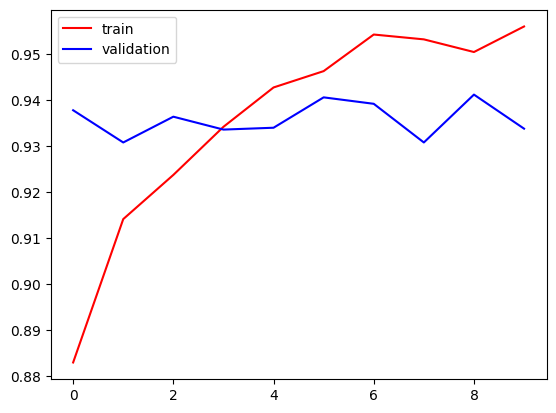

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

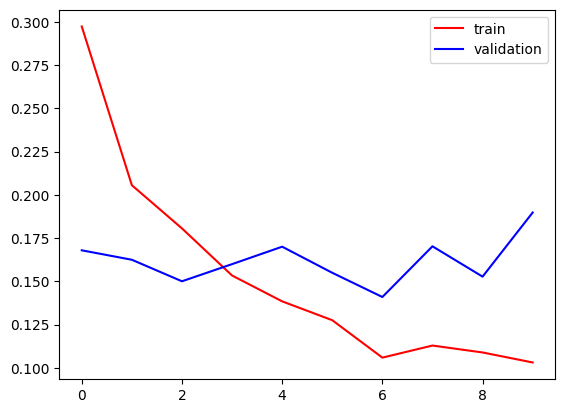

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

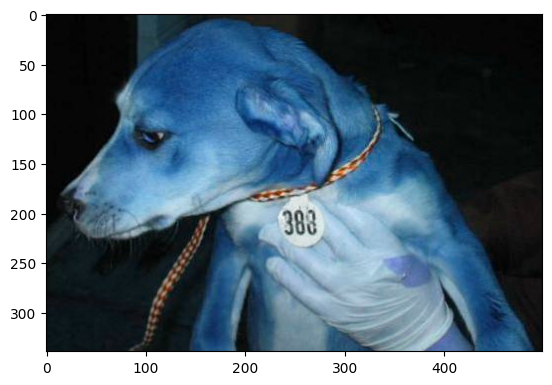

In [ ]:
import cv2
test_img = cv2.imread('/content/test/dogs/dog.10006.jpg')
plt.imshow(test_img)



In [ ]:
test_img.shape

(339, 499, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
p=model.predict(test_input)
if(p==1):
 print(p,":DOG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[1.]] :DOG


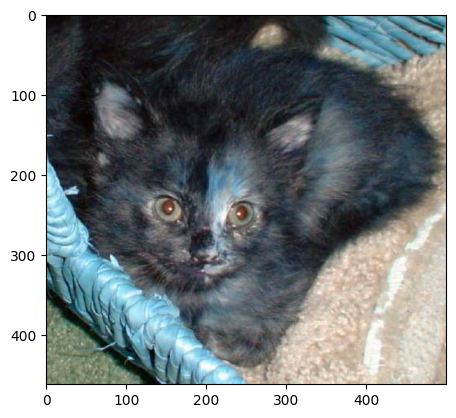

In [ ]:
test_img = cv2.imread('/content/test/cats/cat.10030.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(462, 500, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
p=model.predict(test_input)
if(p==0):
  print(p,":CAT")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.]] :CAT
